### Explore boundary conditions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.dates as mdates
import sys  
sys.path.insert(0, '/home/users/birgal/')
from nemo_python import plots
import cartopy.crs as ccrs
import matplotlib.path as mpath

#### Functions

In [2]:
def prepare_plot(figsize=(9, 7)):
    """This function returns prepared axes for the polar plot.
    
    Usage:
        fig, ax = prepare_plot()
    """
    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    ax.set_boundary(map_circle, transform=ax.transAxes)
    ax.coastlines(); 
    gl = ax.gridlines(draw_labels=True, ylocs=[]);#, color='w', lw=2);
    return fig, ax

#### Load files

In [3]:
bergmelt = xr.open_dataset(f'/home/users/birgal/data/NEMO-test3-20230914/bergmelt.nc')
calving  = xr.open_dataset(f'/home/users/birgal/data/NEMO-test3-20230914/calving.nc')
bfr_coef = xr.open_dataset(f'/home/users/birgal/data/NEMO-test3-20230914/bfr_coef.nc')
runoff   = xr.open_dataset(f'/home/users/birgal/data/forcing_NEMO/ANT025_runoff_b0.2_v0.0.nc')

restart_iceb = xr.open_dataset(f'/home/users/birgal/data/NEMO/restart_icb.nc')

#### View

In [4]:
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

Iceberg melt forcing file

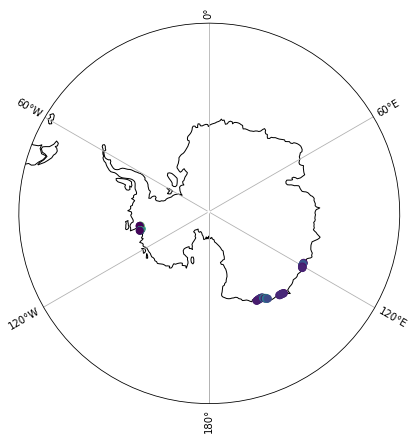

In [12]:
time=25

fig, ax = prepare_plot()

ax.scatter(bergmelt['nav_lon'].values, bergmelt['nav_lat'].values, c=bergmelt['berg_melt'].values[time,:,:], \
           s=50, zorder=3, transform=ccrs.PlateCarree())

Calving file

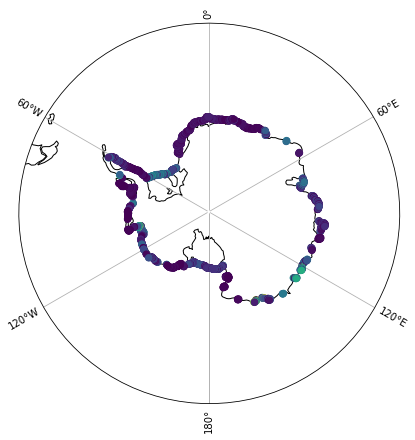

In [29]:
fig, ax = prepare_plot()

ax.scatter(bergmelt['nav_lon'].values[calving['soicbclv'].values[0,:,:] > 0], \
           bergmelt['nav_lat'].values[calving['soicbclv'].values[0,:,:] > 0], \
           c=calving['soicbclv'].values[0,:,:][calving['soicbclv'].values[0,:,:] > 0],
           s=40, zorder=3, transform=ccrs.PlateCarree())

Bottom turbulence forcing file

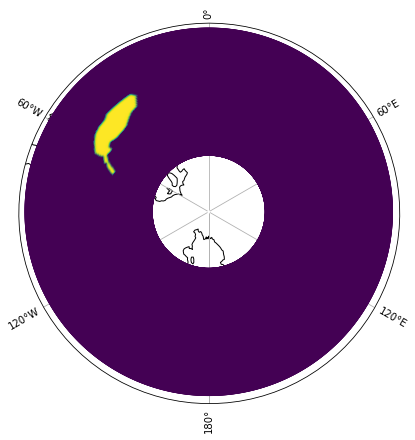

In [18]:
fig, ax = prepare_plot()

ax.scatter(bfr_coef['nav_lon'].values[~np.isnan(bfr_coef['bfr_coef'].values[0,:,:])], \
           bfr_coef['nav_lat'].values[~np.isnan(bfr_coef['bfr_coef'].values[0,:,:])], \
           c=bfr_coef['bfr_coef'].values[0,:,:][~np.isnan(bfr_coef['bfr_coef'].values[0,:,:])], 
           s=50, zorder=3, transform=ccrs.PlateCarree())

Runoff forcing file

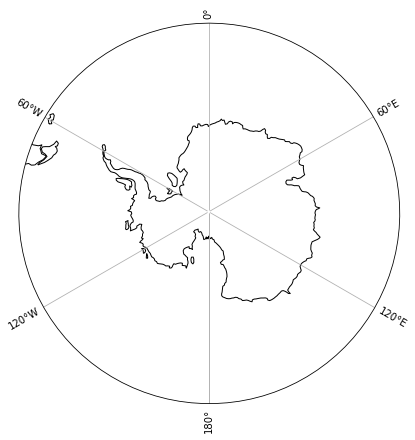

In [11]:
fig, ax = prepare_plot()

ax.scatter(runoff['nav_lon'].values[runoff['socoefr'].values > 0], \
           runoff['nav_lat'].values[runoff['socoefr'].values > 0], \
           c=runoff['socoefr'].values[runoff['socoefr'].values > 0],
           s=40, zorder=3, transform=ccrs.PlateCarree())